In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load metadata file into a Dask DataFrame
metadata_path = '/Users/tanmaysagarhuria/Downloads/metadata (1).csv'
metadata = pd.read_csv(metadata_path)

# Load matrix file into a Dask DataFrame
matrix_path = '/Users/tanmaysagarhuria/Downloads/matrix (2).csv'
dask_df = dd.read_csv(matrix_path, sample=4000000)  # Adjust the sample size if needed

In [4]:
print(metadata.head())

           sample_name   exp_component_name specimen_type cluster_color  \
0  F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
1  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
2  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
3  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
4  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

   cluster_order          cluster_label class_color  class_order class_label  \
0            NaN                    NaN         NaN          NaN         NaN   
1           32.0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic   
2            2.0     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic   
3            1.0      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic   
4           34.0  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic   

  subclass_color  ...  cell_type_alt_alias_order cell_type_alt_alias

In [5]:
print(dask_df.head())

           sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  5-HT3C2  A1BG  \
0  F2S4_160113_027_A01        0        0        0        0        0     0   
1  F2S4_160113_027_B01        0        0        0        0        0   118   
2  F2S4_160113_027_C01        0        0        0        0        0     0   
3  F2S4_160113_027_D01        0        0        0        0        0   159   
4  F2S4_160113_027_E01        0        0        0        0        0     1   

   A1BG-AS1  A1CF  A2M  ...  ZXDB  ZXDC  ZYG11A  ZYG11AP1  ZYG11B  ZYX  ZZEF1  \
0         0     0   41  ...     0   282       0         0       0   41    448   
1         0     0    0  ...     0   892       0         0     125    0      0   
2         0     0    0  ...     0     0       1         0     161    0    102   
3         0     0    0  ...     0   155       1         0      81    0      3   
4         0     0    1  ...     0    14       1         0     490    0      4   

   ZZZ3  bA255A11.4  bA395L14.12  
0     0        

In [6]:
dask_df = dask_df.fillna(0)  # Filling missing values with 0

In [7]:
def log_normalize(df):
    # Apply log1p (log(1 + x)) to stabilize variance and prevent log(0) issues
    df = np.log1p(df)
    return df


In [9]:
import dask.dataframe as dd
import numpy as np
import pandas as pd

dask_df_normalized = dask_df.map_partitions(
    lambda df: df.assign(**{col: log_normalize(df[col]) for col in df.columns if col != 'sample_name'})
)

In [11]:
print(dask_df_normalized.head())

           sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  5-HT3C2      A1BG  \
0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0      0.0  0.000000   
1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0      0.0  4.779123   
2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0      0.0  0.000000   
3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0      0.0  5.075174   
4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0      0.0  0.693147   

   A1BG-AS1  A1CF       A2M  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1  \
0       0.0   0.0  3.737670  ...   0.0  5.645447  0.000000       0.0   
1       0.0   0.0  0.000000  ...   0.0  6.794587  0.000000       0.0   
2       0.0   0.0  0.000000  ...   0.0  0.000000  0.693147       0.0   
3       0.0   0.0  0.000000  ...   0.0  5.049856  0.693147       0.0   
4       0.0   0.0  0.693147  ...   0.0  2.708050  0.693147       0.0   

     ZYG11B      ZYX     ZZEF1      ZZZ3  bA255A11.4  bA395L14.12  
0  0.000000 

In [13]:
# View a sample of the original data (before normalization)
original_sample = dask_df.head(10)  # Adjust the number of rows as needed
print(original_sample)

           sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  5-HT3C2  A1BG  \
0  F2S4_160113_027_A01        0        0        0        0        0     0   
1  F2S4_160113_027_B01        0        0        0        0        0   118   
2  F2S4_160113_027_C01        0        0        0        0        0     0   
3  F2S4_160113_027_D01        0        0        0        0        0   159   
4  F2S4_160113_027_E01        0        0        0        0        0     1   
5  F2S4_160113_027_F01        0        0        0        0        0    10   
6  F2S4_160113_027_G01        0        0        0        0        0     0   
7  F2S4_160113_028_B01        0        0        0        0        0     1   
8  F2S4_160113_028_C01        0        0        0        0        0     0   
9  F2S4_160113_028_F01        0        0        0        0        0     0   

   A1BG-AS1  A1CF  A2M  ...  ZXDB  ZXDC  ZYG11A  ZYG11AP1  ZYG11B  ZYX  ZZEF1  \
0         0     0   41  ...     0   282       0         0       0   41 

In [14]:
# Trigger computation for the normalized DataFrame and view a sample
normalized_sample = dask_df_normalized.head(10)  # Adjust the number of rows as needed
print(normalized_sample)

           sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  5-HT3C2      A1BG  \
0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0      0.0  0.000000   
1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0      0.0  4.779123   
2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0      0.0  0.000000   
3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0      0.0  5.075174   
4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0      0.0  0.693147   
5  F2S4_160113_027_F01      0.0      0.0      0.0      0.0      0.0  2.397895   
6  F2S4_160113_027_G01      0.0      0.0      0.0      0.0      0.0  0.000000   
7  F2S4_160113_028_B01      0.0      0.0      0.0      0.0      0.0  0.693147   
8  F2S4_160113_028_C01      0.0      0.0      0.0      0.0      0.0  0.000000   
9  F2S4_160113_028_F01      0.0      0.0      0.0      0.0      0.0  0.000000   

   A1BG-AS1  A1CF       A2M  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1  \
0       0.0   0.0  3.737670  ...   0

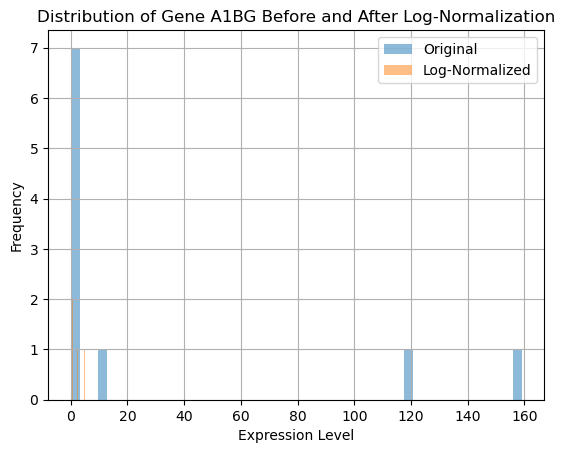

In [15]:
import matplotlib.pyplot as plt

# Plot histogram for a specific gene (column) before normalization
original_sample['A1BG'].hist(bins=50, alpha=0.5, label='Original')
# Plot histogram for the same gene after normalization
normalized_sample['A1BG'].hist(bins=50, alpha=0.5, label='Log-Normalized')

plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.title('Distribution of Gene A1BG Before and After Log-Normalization')
plt.legend()
plt.show()

In [16]:
# Display descriptive statistics before normalization
print("Original Data Statistics:")
print(original_sample.describe())

# Display descriptive statistics after normalization
print("Log-Normalized Data Statistics:")
print(normalized_sample.describe())

Original Data Statistics:
       3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  5-HT3C2        A1BG  A1BG-AS1  \
count     10.0     10.0     10.0     10.0     10.0   10.000000      10.0   
mean       0.0      0.0      0.0      0.0      0.0   28.900000       0.0   
std        0.0      0.0      0.0      0.0      0.0   58.646682       0.0   
min        0.0      0.0      0.0      0.0      0.0    0.000000       0.0   
25%        0.0      0.0      0.0      0.0      0.0    0.000000       0.0   
50%        0.0      0.0      0.0      0.0      0.0    0.500000       0.0   
75%        0.0      0.0      0.0      0.0      0.0    7.750000       0.0   
max        0.0      0.0      0.0      0.0      0.0  159.000000       0.0   

       A1CF         A2M  A2M-AS1  ...  ZXDB        ZXDC     ZYG11A  ZYG11AP1  \
count  10.0   10.000000     10.0  ...  10.0   10.000000  10.000000      10.0   
mean    0.0   27.300000      0.0  ...   0.0  178.800000   0.300000       0.0   
std     0.0   72.717184      0.0  ...   0.0  279.

In [19]:
import dask.dataframe as dd
import numpy as np
import pandas as pd

# Ensure that only numeric columns are processed
# First, let's identify the numeric columns
numeric_columns = dask_df_normalized.select_dtypes(include=[np.number]).columns


In [20]:
gene_means = dask_df_normalized[numeric_columns].mean(axis=0).compute()
gene_variances = dask_df_normalized[numeric_columns].var(axis=0).compute()


In [21]:
# Combine means and variances into a single DataFrame
gene_stats = pd.DataFrame({
    'mean': gene_means,
    'variance': gene_variances
})

# Display the first few rows to inspect
print(gene_stats.head())

             mean  variance
3.8-1.2  0.001054  0.003344
3.8-1.3  0.002859  0.011271
3.8-1.4  0.001249  0.004168
3.8-1.5  0.000748  0.001663
5-HT3C2  0.028359  0.064324


In [22]:
# Set a threshold for variance to select HVGs
variance_threshold = gene_stats['variance'].quantile(0.9)  # Top 10% most variable genes

# Select genes with variance above the threshold
hvg = gene_stats[gene_stats['variance'] > variance_threshold]

In [23]:
# Select top N HVGs directly
top_n = 2000  # Adjust this number based on your needs
hvg = gene_stats.nlargest(top_n, 'variance')

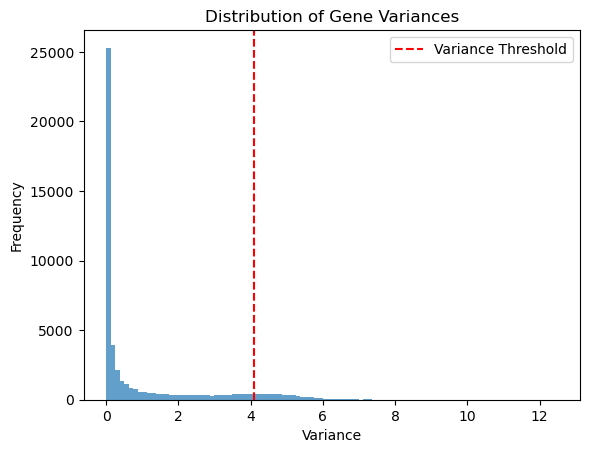

In [24]:
import matplotlib.pyplot as plt

# Plot the distribution of variances
plt.hist(gene_stats['variance'], bins=100, alpha=0.7)
plt.axvline(x=variance_threshold, color='red', linestyle='--', label='Variance Threshold')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Variances')
plt.legend()
plt.show()

In [25]:
hvg = gene_stats[gene_stats['variance'] > variance_threshold]

# Display the first few rows of HVGs to inspect
print(hvg.head())

           mean  variance
A2M    1.766813  5.255239
AAAS   1.491209  4.219511
AACS   2.459467  4.562977
AADAT  1.330299  4.165750
AAGAB  2.263543  5.053927


In [27]:
# Subset the normalized data to include only HVGs
hvg_genes = hvg.index  # These are the genes with high variance

In [28]:
dask_df_hvg = dask_df_normalized[hvg_genes]

In [29]:
# Persist the subsetted data for efficiency
dask_df_hvg = dask_df_hvg.persist()

In [30]:
# Save the DataFrame with HVGs to a CSV file
dask_df_hvg.to_csv('hvg_normalized_output.csv', single_file=True, index=False)

['/Users/tanmaysagarhuria/hvg_normalized_output.csv']

In [31]:
import dask_ml.decomposition
import matplotlib.pyplot as plt

In [32]:
pca = dask_ml.decomposition.PCA(n_components=2)

In [34]:
# Convert the Dask DataFrame to a Dask Array
dask_array_hvg = dask_df_hvg.to_dask_array(lengths=True)

In [35]:
from dask_ml.decomposition import PCA

# Initialize PCA with the 'randomized' solver
pca = PCA(n_components=2, svd_solver='randomized')


In [36]:
# Fit and transform the Dask Array
pca_result = pca.fit_transform(dask_array_hvg)


In [37]:
pca_result = pca_result.persist()

In [38]:
pca_df = pca_result.compute()


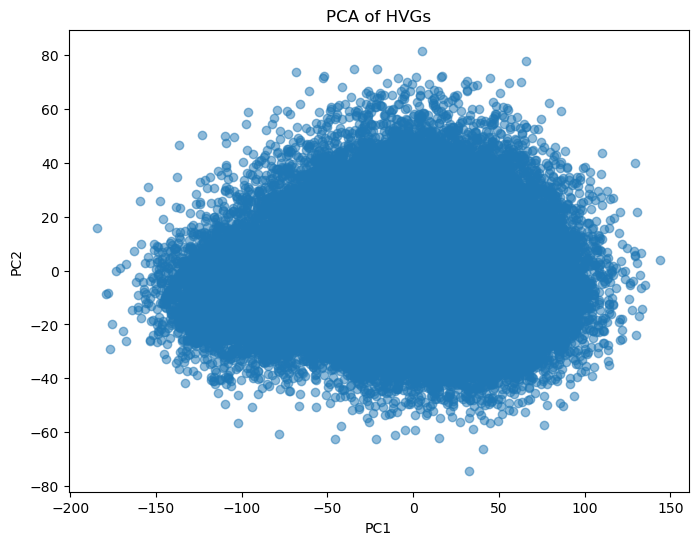

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[:, 0], pca_df[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of HVGs')
plt.show()

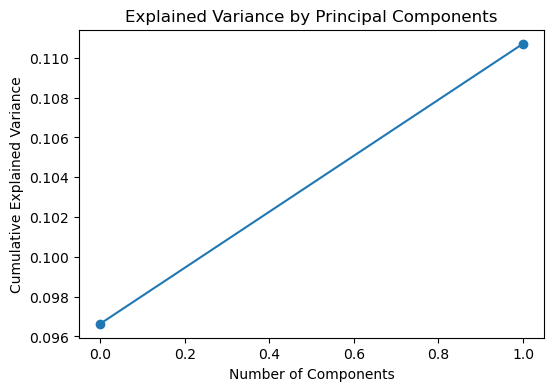

In [40]:
# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [41]:
pca_20 = dask_ml.decomposition.PCA(n_components=20, svd_solver='randomized')

In [42]:
pca_result_20 = pca_20.fit_transform(dask_array_hvg)

In [43]:
pca_result_20 = pca_result_20.persist()

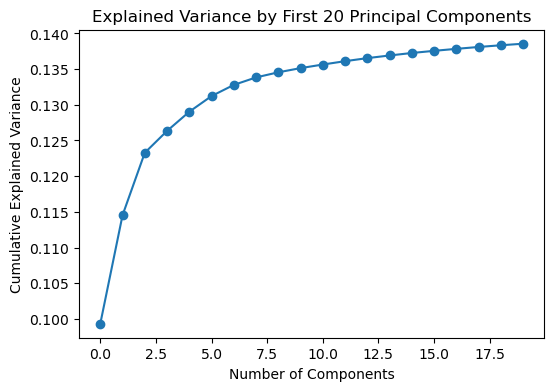

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca_20.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by First 20 Principal Components')
plt.show()

In [45]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
import umap
import matplotlib.pyplot as plt

In [47]:
dask_array_hvg = dask_df_hvg.to_dask_array(lengths=True)

In [48]:
umap_model = umap.UMAP(n_components=2, random_state=42)

In [49]:
umap_result = umap_model.fit_transform(dask_array_hvg.compute())

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


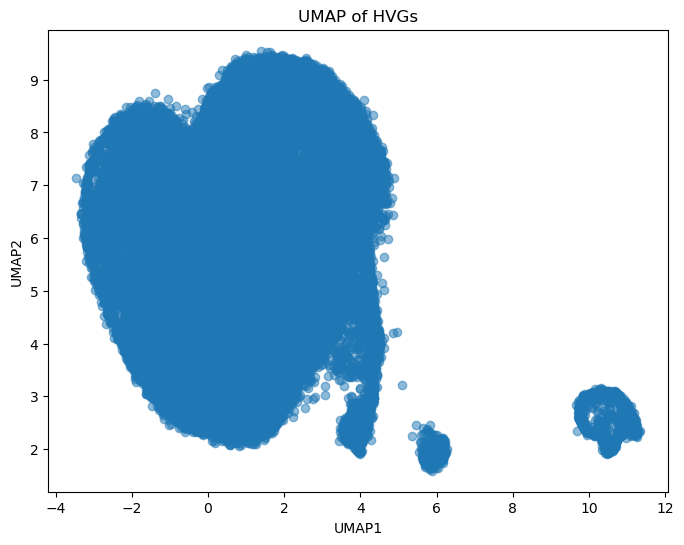

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP of HVGs')
plt.show()

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [52]:
# Apply K-Means with a predefined number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(umap_result)

# Get the cluster labels
labels = kmeans.labels_

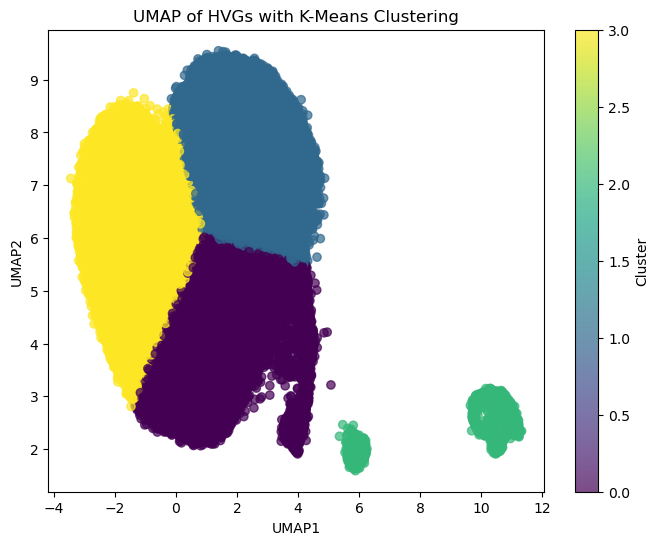

In [53]:
# Plot UMAP with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP of HVGs with K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

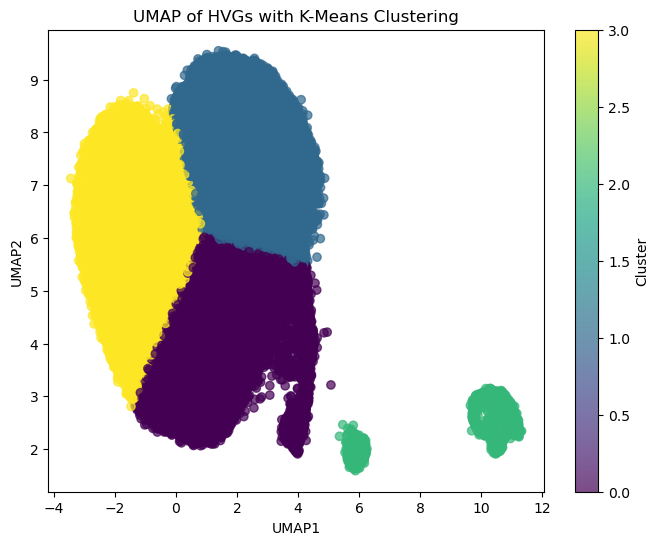

In [54]:
# Plot UMAP with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP of HVGs with K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(umap_result)

# Get the cluster labels
labels = dbscan.labels_

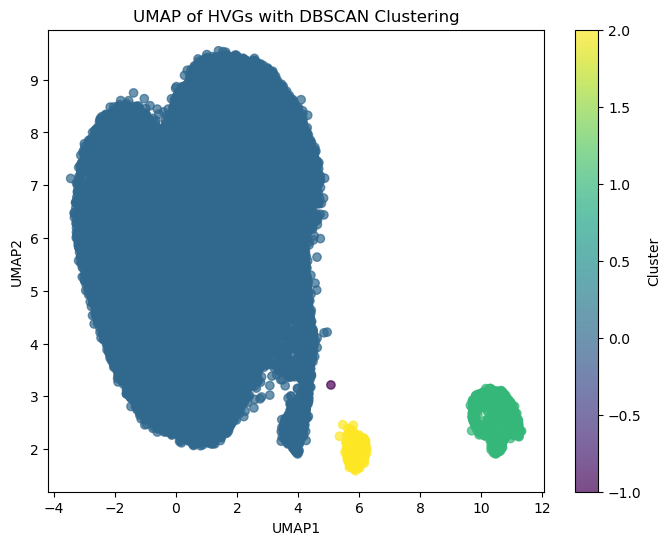

In [57]:
# Plot UMAP with DBSCAN cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP of HVGs with DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [58]:
pip install scanpy igraph louvain

  Obtaining dependency information for scanpy from https://files.pythonhosted.org/packages/2f/9d/05129619c6bd9a657a64a9c19ec8d0eb46eb06c3107c48e38b1b6e70c088/scanpy-1.10.2-py3-none-any.whl.metadata
  Obtaining dependency information for igraph from https://files.pythonhosted.org/packages/e4/3b/5cf3b131d433dea61608ea2c27bebf74de9cc7a50ced0b26311d6288294e/igraph-0.11.6-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for louvain from https://files.pythonhosted.org/packages/fc/26/d99a77f5c17ef366bbd11b3509dfad47bcd968c4c1778bfccd4279e4ea25/louvain-0.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for anndata>=0.8 from https://files.pythonhosted.org/packages/eb/58/2608b71280b351369b6190818c16cf90ad1d1ab2f30c2be68c8bd2c1749b/anndata-0.10.8-py3-none-any.whl.metadata
  Obtaining dependency information for legacy-api-wrap>=1.4 from https://files.pythonhosted.org/packages/97/08/eaf39f00542e4181b65617805f116a0d38daec98d0dce36ec94327ca8

In [60]:
import scanpy as sc
import pandas as pd

In [61]:
# Convert to AnnData object
adata = sc.AnnData(dask_df_hvg.compute().values)
adata.var_names = dask_df_hvg.columns
adata.obs_names = dask_df_hvg.index

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


In [62]:
# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [63]:
sc.tl.louvain(adata, key_added='louvain')

In [65]:
# Compute UMAP coordinates
sc.tl.umap(adata)

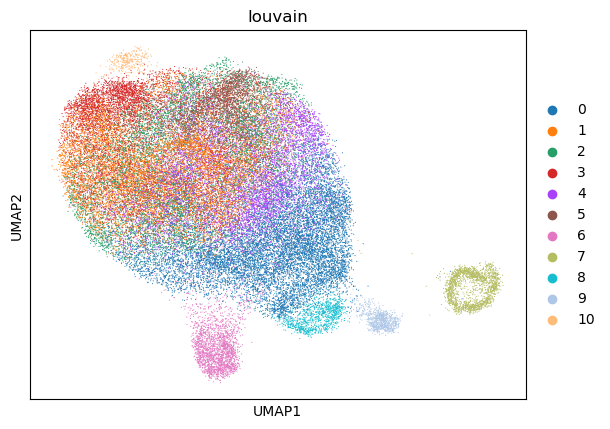

In [66]:
sc.pl.umap(adata, color=['louvain'])

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 5028 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


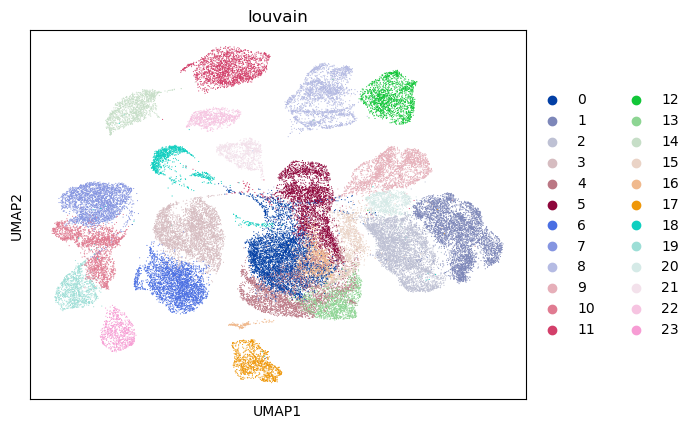

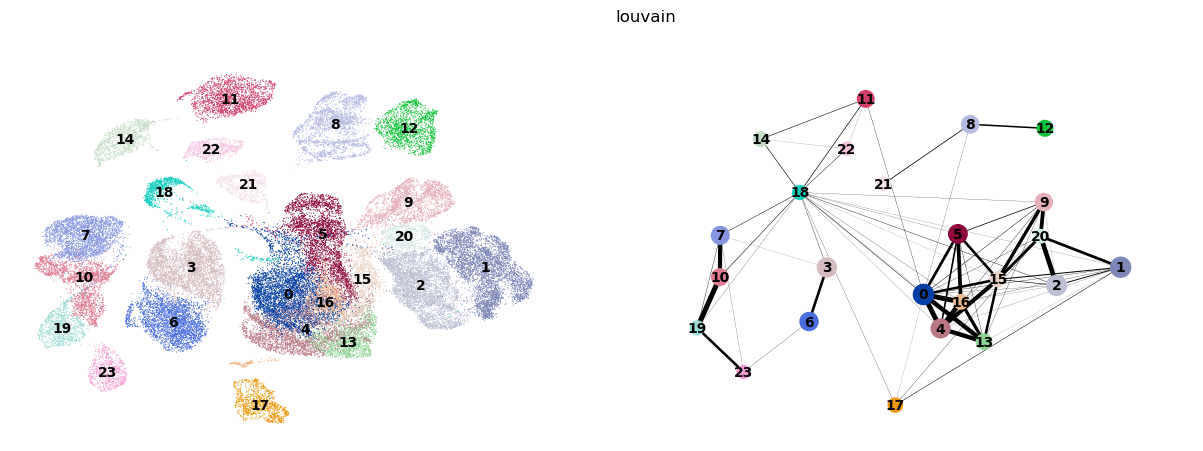

[<Axes: xlabel='UMAP1', ylabel='UMAP2'>, <Axes: >]

In [67]:
import scanpy as sc

# Step 1: Calculate the neighborhood graph with different k values
sc.pp.neighbors(adata, n_neighbors=15)  # Try k = 15 first

# Step 2: Run Louvain clustering
sc.tl.louvain(adata, resolution=0.6)  # Resolution can also be adjusted

# Step 3: Visualize the results
sc.tl.umap(adata)
sc.pl.umap(adata, color=['louvain'])

# Step 4: Evaluate the clusters
sc.tl.paga(adata)  # This helps in understanding the connectivity between clusters
sc.pl.paga_compare(adata)

In [68]:
import scanpy as sc

# Assuming 'adata' is your AnnData object with Louvain clustering already performed
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test', n_genes=20)

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:440: Performanc

In [69]:
# Collect the results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

In [70]:
ranked_genes = pd.DataFrame(
    {group: result['names'][group] for group in groups}
)

In [72]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Create a DataFrame to store the results all at once
ranked_genes = pd.DataFrame({group: result['names'][group] for group in groups})


In [73]:
scores_df = pd.DataFrame({group: result['scores'][group] for group in groups})
pvals_df = pd.DataFrame({group: result['pvals'][group] for group in groups})
pvals_adj_df = pd.DataFrame({group: result['pvals_adj'][group] for group in groups})
logfoldchanges_df = pd.DataFrame({group: result['logfoldchanges'][group] for group in groups})

In [74]:
ranked_genes = pd.concat([ranked_genes, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

In [75]:
ranked_genes = ranked_genes.copy()

In [76]:
print(ranked_genes.head())

         0             1       2         3        4       5        6        7  \
0   TESPA1  LOC105373893  CLSTN2     GRIK1     CUX2   NTNG1    ERBB4   ADARB2   
1  FAM19A1         RXFP1  CADPS2     NXPH1  FAM19A1    RORB    NXPH1    ERBB4   
2     ENC1        THEMIS   PDE1A    SPOCK3   HS6ST3  POU6F2  ZNF385D    SYNPR   
3     CUX2         PTPRK    RORB     SYNPR     RGS6    CUX2     GAD1    RGS12   
4   KCNIP4         CDH12   LRRK1  KIAA1217   KCNIP4   CNTN5   ZNF536  SLC24A3   

         8         9  ...        14        15        16        17        18  \
0   SEMA3E     TSHZ2  ...  9.316228  7.776322  3.589528  6.870674  8.546705   
1   HS3ST4       DCC  ...  8.365325  2.478039  5.348121  6.512922  6.873794   
2  EGFEM1P      RORB  ...  8.412590  3.426393  2.844109  3.948663  6.806718   
3     DLC1       TOX  ...  6.496759  4.468586  4.435489  4.788514  6.430699   
4    FOXP2  IL1RAPL2  ...  6.008715  2.428862  2.601596  5.105376  5.598849   

          19        20        21      

In [78]:
top_gene_names = ranked_genes.iloc[:, :10] 

In [79]:
top_gene_names_flat = top_gene_names.values.flatten()  # Flatten to get a 1D array of gene names

In [80]:
valid_gene_names = [gene for gene in top_gene_names_flat if gene in adata.var_names]

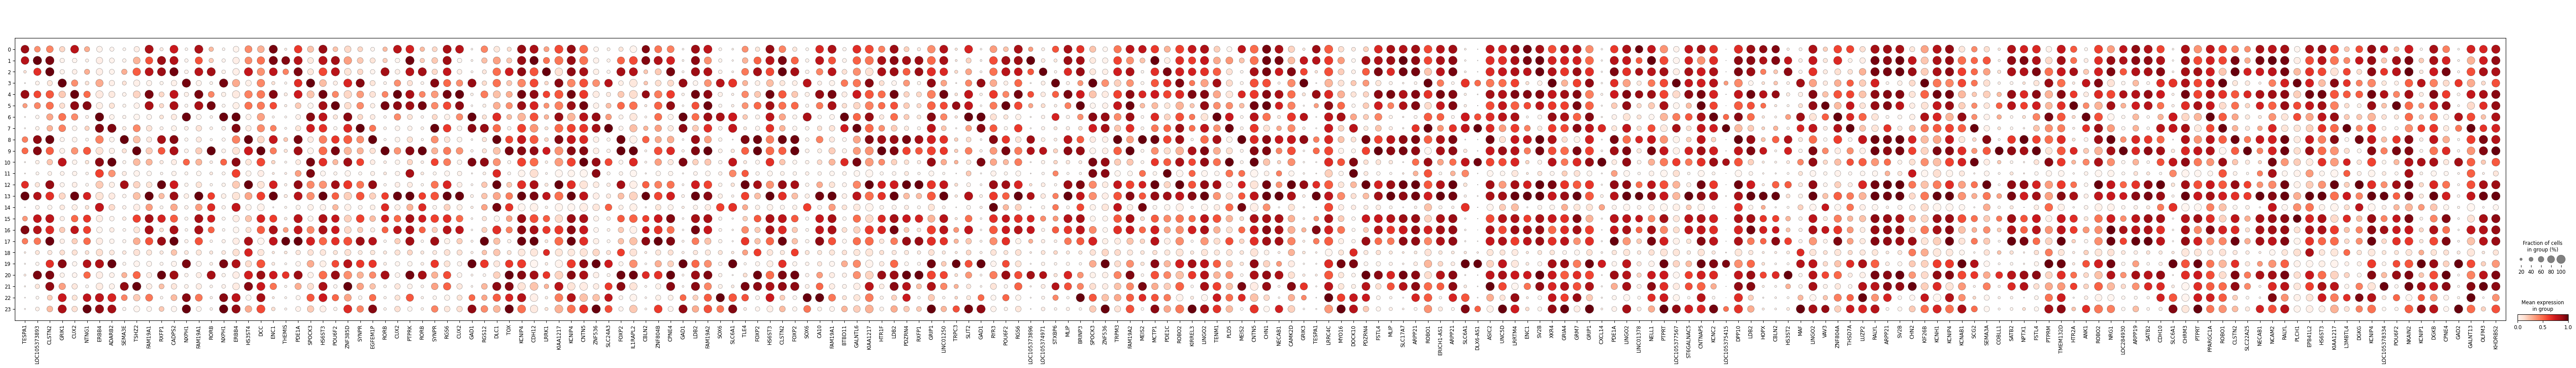

In [81]:
sc.pl.dotplot(adata, var_names=valid_gene_names, groupby='louvain', standard_scale='var')

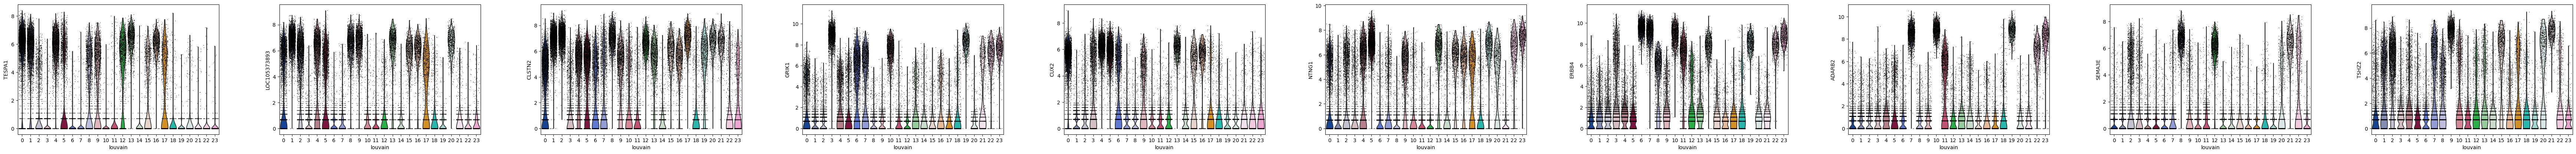

In [84]:
top_genes = valid_gene_names[:10]  # Select top 10 genes, for example
sc.pl.violin(adata, keys=top_genes, groupby='louvain', jitter=0.4)

In [91]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:440: Performanc

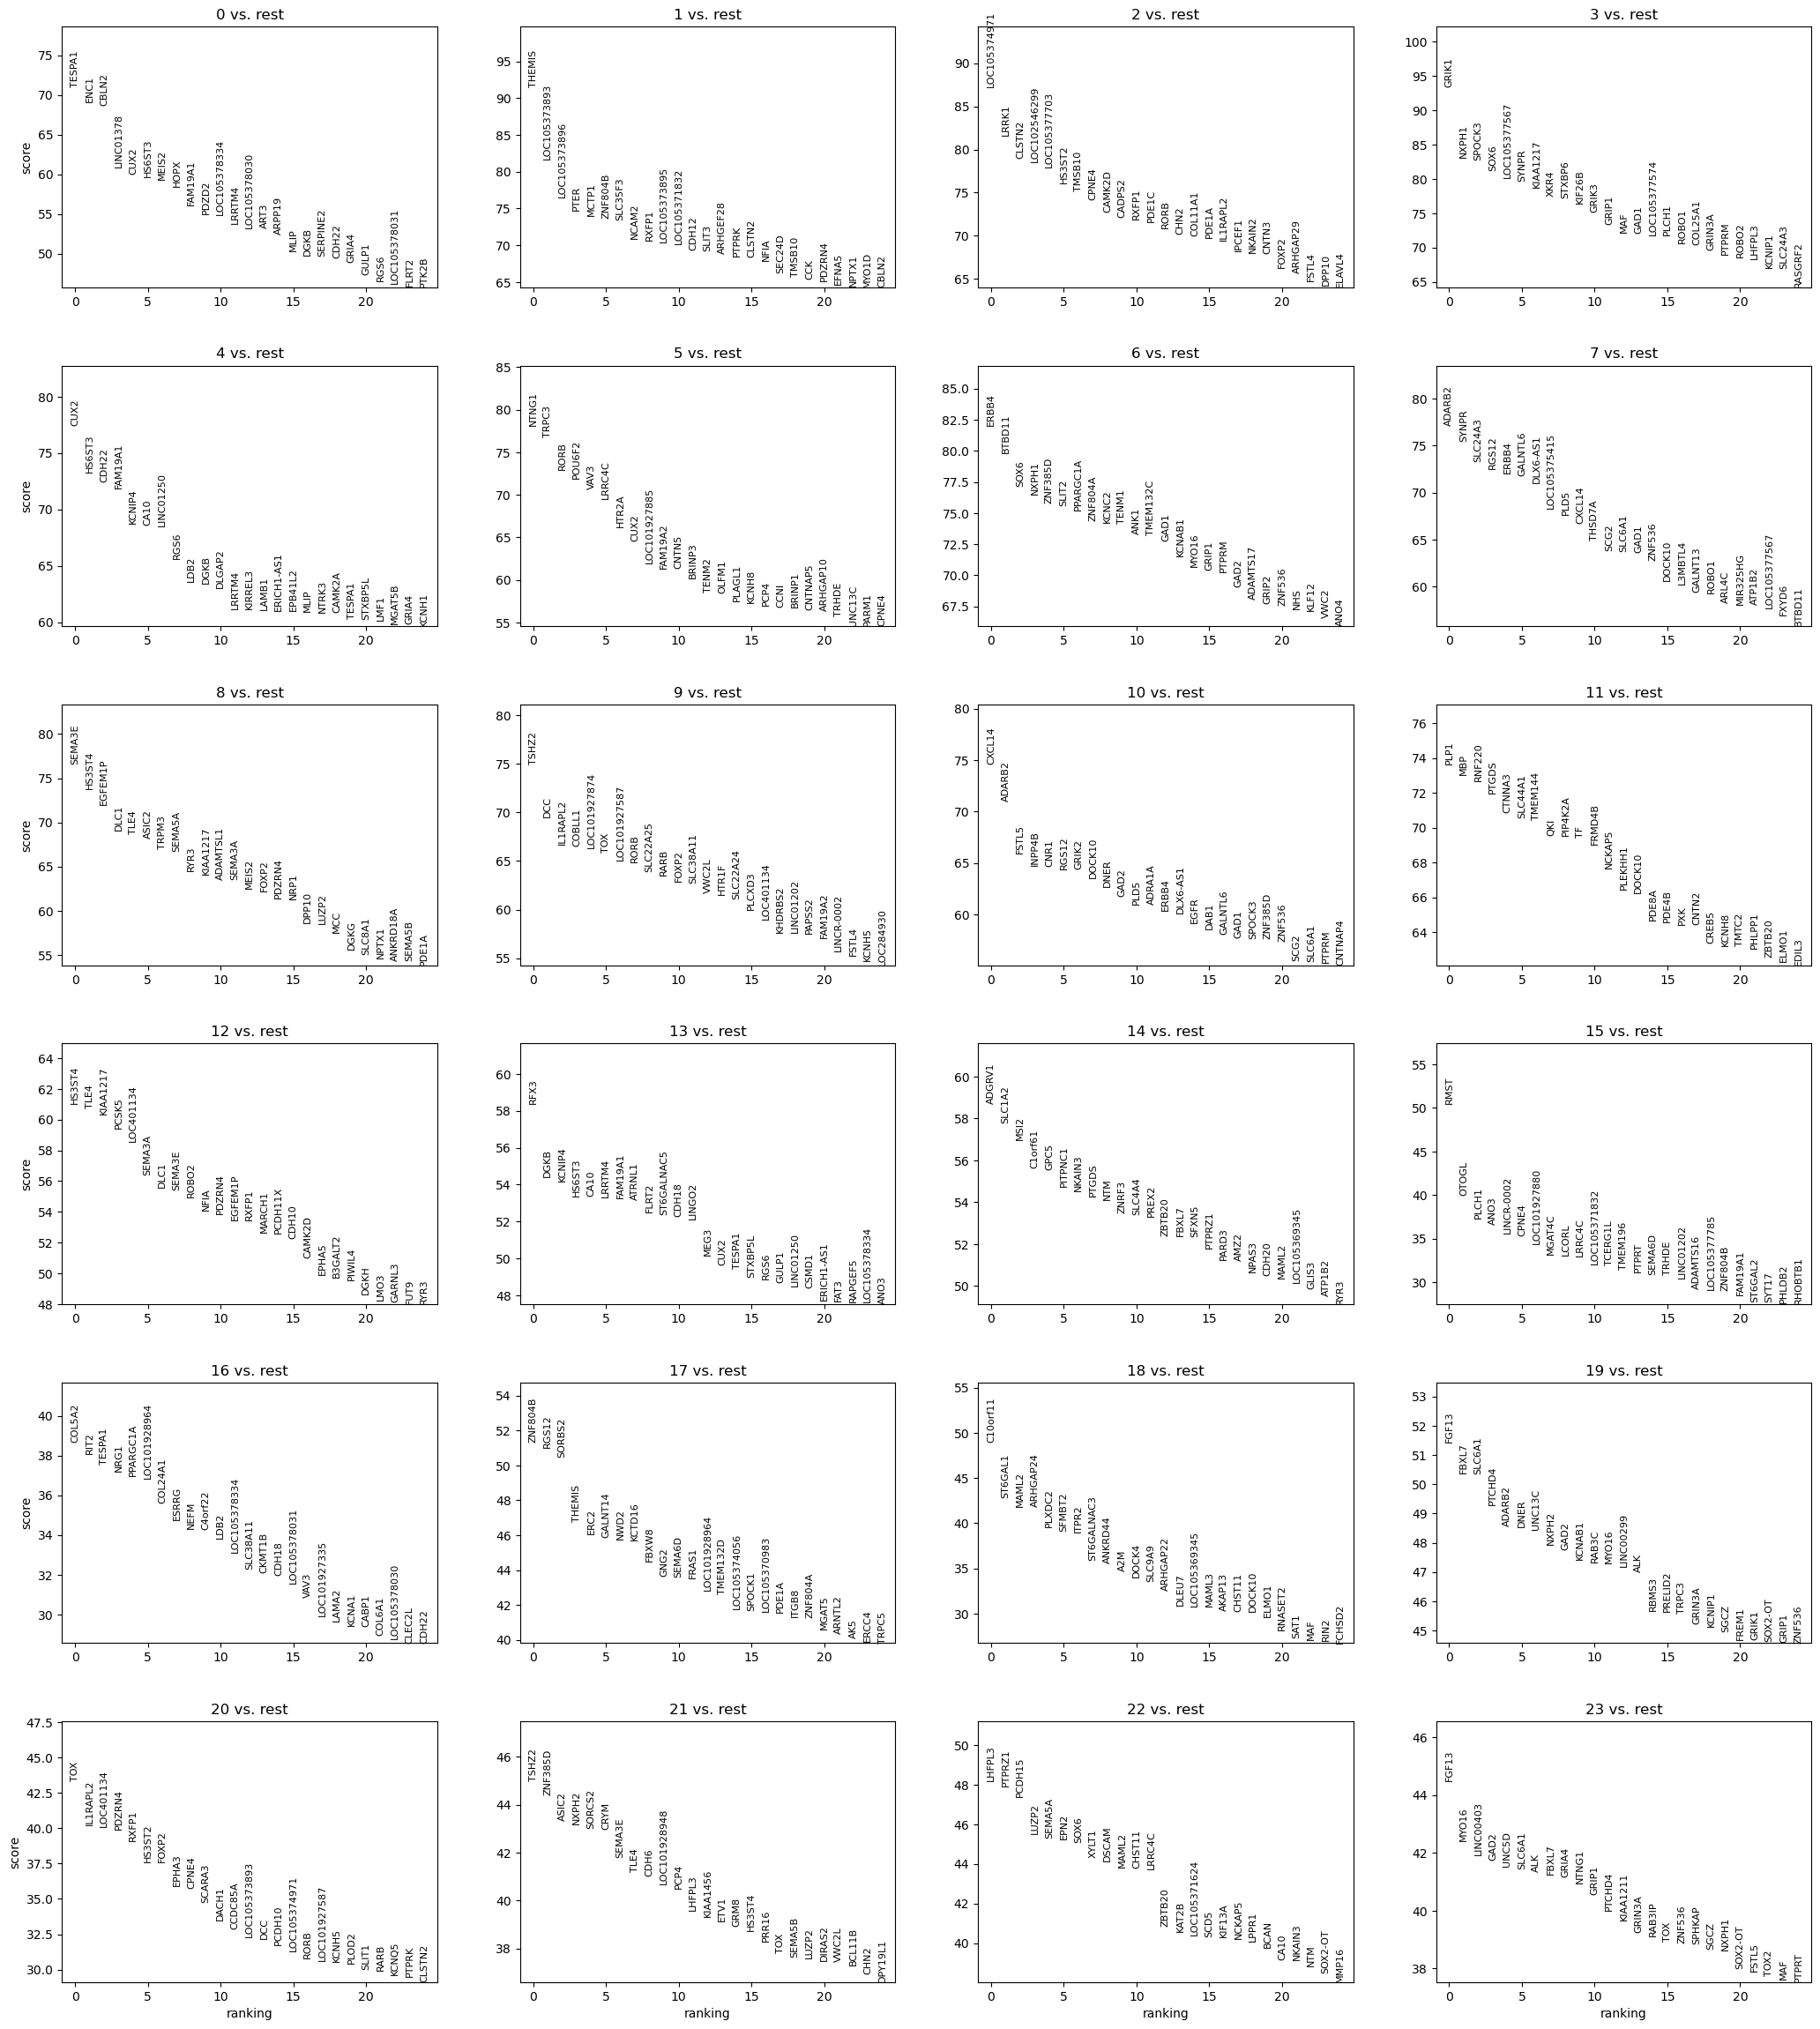

In [93]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [94]:
print(metadata.head())

           sample_name   exp_component_name specimen_type cluster_color  \
0  F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
1  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
2  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
3  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
4  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

   cluster_order          cluster_label class_color  class_order class_label  \
0            NaN                    NaN         NaN          NaN         NaN   
1           32.0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic   
2            2.0     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic   
3            1.0      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic   
4           34.0  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic   

  subclass_color  ...  cell_type_alt_alias_order cell_type_alt_alias

In [95]:
import pandas as pd

In [96]:
metadata.set_index('sample_name', inplace=True)

In [98]:
print(adata.obs.columns)
print(metadata.columns)

Index(['louvain'], dtype='object')
Index(['exp_component_name', 'specimen_type', 'cluster_color', 'cluster_order',
       'cluster_label', 'class_color', 'class_order', 'class_label',
       'subclass_color', 'subclass_order', 'subclass_label',
       'full_genotype_color', 'full_genotype_order', 'full_genotype_label',
       'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color',
       'region_order', 'region_label', 'cortical_layer_color',
       'cortical_layer_order', 'cortical_layer_label',
       'cell_type_accession_color', 'cell_type_accession_order',
       'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order',
       'cell_type_alias_label', 'cell_type_alt_alias_color',
       'cell_type_alt_alias_order', 'cell_type_alt_alias_label',
       'cell_type_designation_color', 'cell_type_designation_order',
       'cell_type_designation_label', 'external_donor_name_color',
       'external_donor_name_order', 'external_donor_name_label',
       'o

In [99]:
metadata_path = '/Users/tanmaysagarhuria/Downloads/metadata (1).csv'
metadata = pd.read_csv(metadata_path)

In [100]:
print(metadata.head())

           sample_name   exp_component_name specimen_type cluster_color  \
0  F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
1  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
2  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
3  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
4  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

   cluster_order          cluster_label class_color  class_order class_label  \
0            NaN                    NaN         NaN          NaN         NaN   
1           32.0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic   
2            2.0     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic   
3            1.0      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic   
4           34.0  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic   

  subclass_color  ...  cell_type_alt_alias_order cell_type_alt_alias

In [102]:
print(adata.obs.columns)
print(metadata.columns)

Index(['louvain'], dtype='object')
Index(['exp_component_name', 'specimen_type', 'cluster_color', 'cluster_order',
       'cluster_label', 'class_color', 'class_order', 'class_label',
       'subclass_color', 'subclass_order', 'subclass_label',
       'full_genotype_color', 'full_genotype_order', 'full_genotype_label',
       'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color',
       'region_order', 'region_label', 'cortical_layer_color',
       'cortical_layer_order', 'cortical_layer_label',
       'cell_type_accession_color', 'cell_type_accession_order',
       'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order',
       'cell_type_alias_label', 'cell_type_alt_alias_color',
       'cell_type_alt_alias_order', 'cell_type_alt_alias_label',
       'cell_type_designation_color', 'cell_type_designation_order',
       'cell_type_designation_label', 'external_donor_name_color',
       'external_donor_name_order', 'external_donor_name_label',
       'o

In [103]:
# Check if the indices match
print(adata.obs.index)
print(metadata.index)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       593, 594, 595, 596, 597, 598, 599, 600, 601, 602],
      dtype='int64', length=49417)
Index(['F2S4_160113_027_A01', 'F2S4_160113_027_B01', 'F2S4_160113_027_C01',
       'F2S4_160113_027_D01', 'F2S4_160113_027_E01', 'F2S4_160113_027_F01',
       'F2S4_160113_027_G01', 'F2S4_160113_028_B01', 'F2S4_160113_028_C01',
       'F2S4_160113_028_F01',
       ...
       'F2S4_190227_099_F01', 'F2S4_190227_099_G01', 'F2S4_190227_099_H01',
       'F2S4_190227_100_A01', 'F2S4_190227_100_B01', 'F2S4_190227_100_C01',
       'F2S4_190227_100_E01', 'F2S4_190227_100_F01', 'F2S4_190227_100_G01',
       'F2S4_190227_100_H01'],
      dtype='object', name='sample_name', length=49417)


In [104]:
print(adata.obs.columns)

Index(['louvain'], dtype='object')


In [105]:
serotonin_genes = ['HTR1A', 'HTR1B', 'HTR2A', 'HTR2C', 'HTR3A', 'HTR4', 'HTR5A', 'HTR6', 'HTR7', 'SLC6A4']

# Filter valid genes in your dataset
valid_serotonin_genes = [gene for gene in serotonin_genes if gene in adata.var_names]


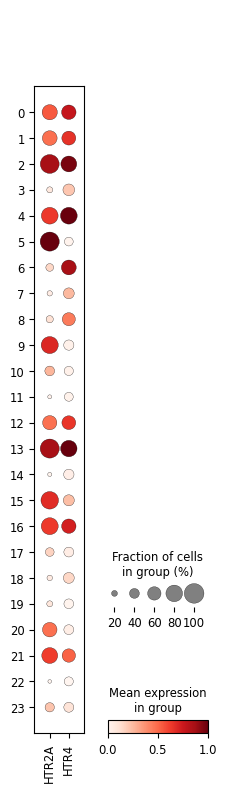

In [106]:
sc.pl.dotplot(adata, var_names=valid_serotonin_genes, groupby='louvain', standard_scale='var')


In [108]:
print(metadata.head())
print(adata.obs.head())

                      exp_component_name specimen_type cluster_color  \
sample_name                                                            
F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

                     cluster_order          cluster_label class_color  \
sample_name                                                             
F2S4_160113_027_A01            NaN                    NaN         NaN   
F2S4_160113_027_B01           32.0      Inh L2-5 VIP TOX2     #0066FF   
F2S4_160113_027_C01            2.0     Inh L1 LAMP5 GGT8P     #0066FF   
F2S4_160113_027_D01            1.0      Inh L1 LAMP5 NDNF     #0066FF   
F2S4_160113_027_E01           34.0  Inh L1-3 VIP ZNF322P1

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:440: Performanc

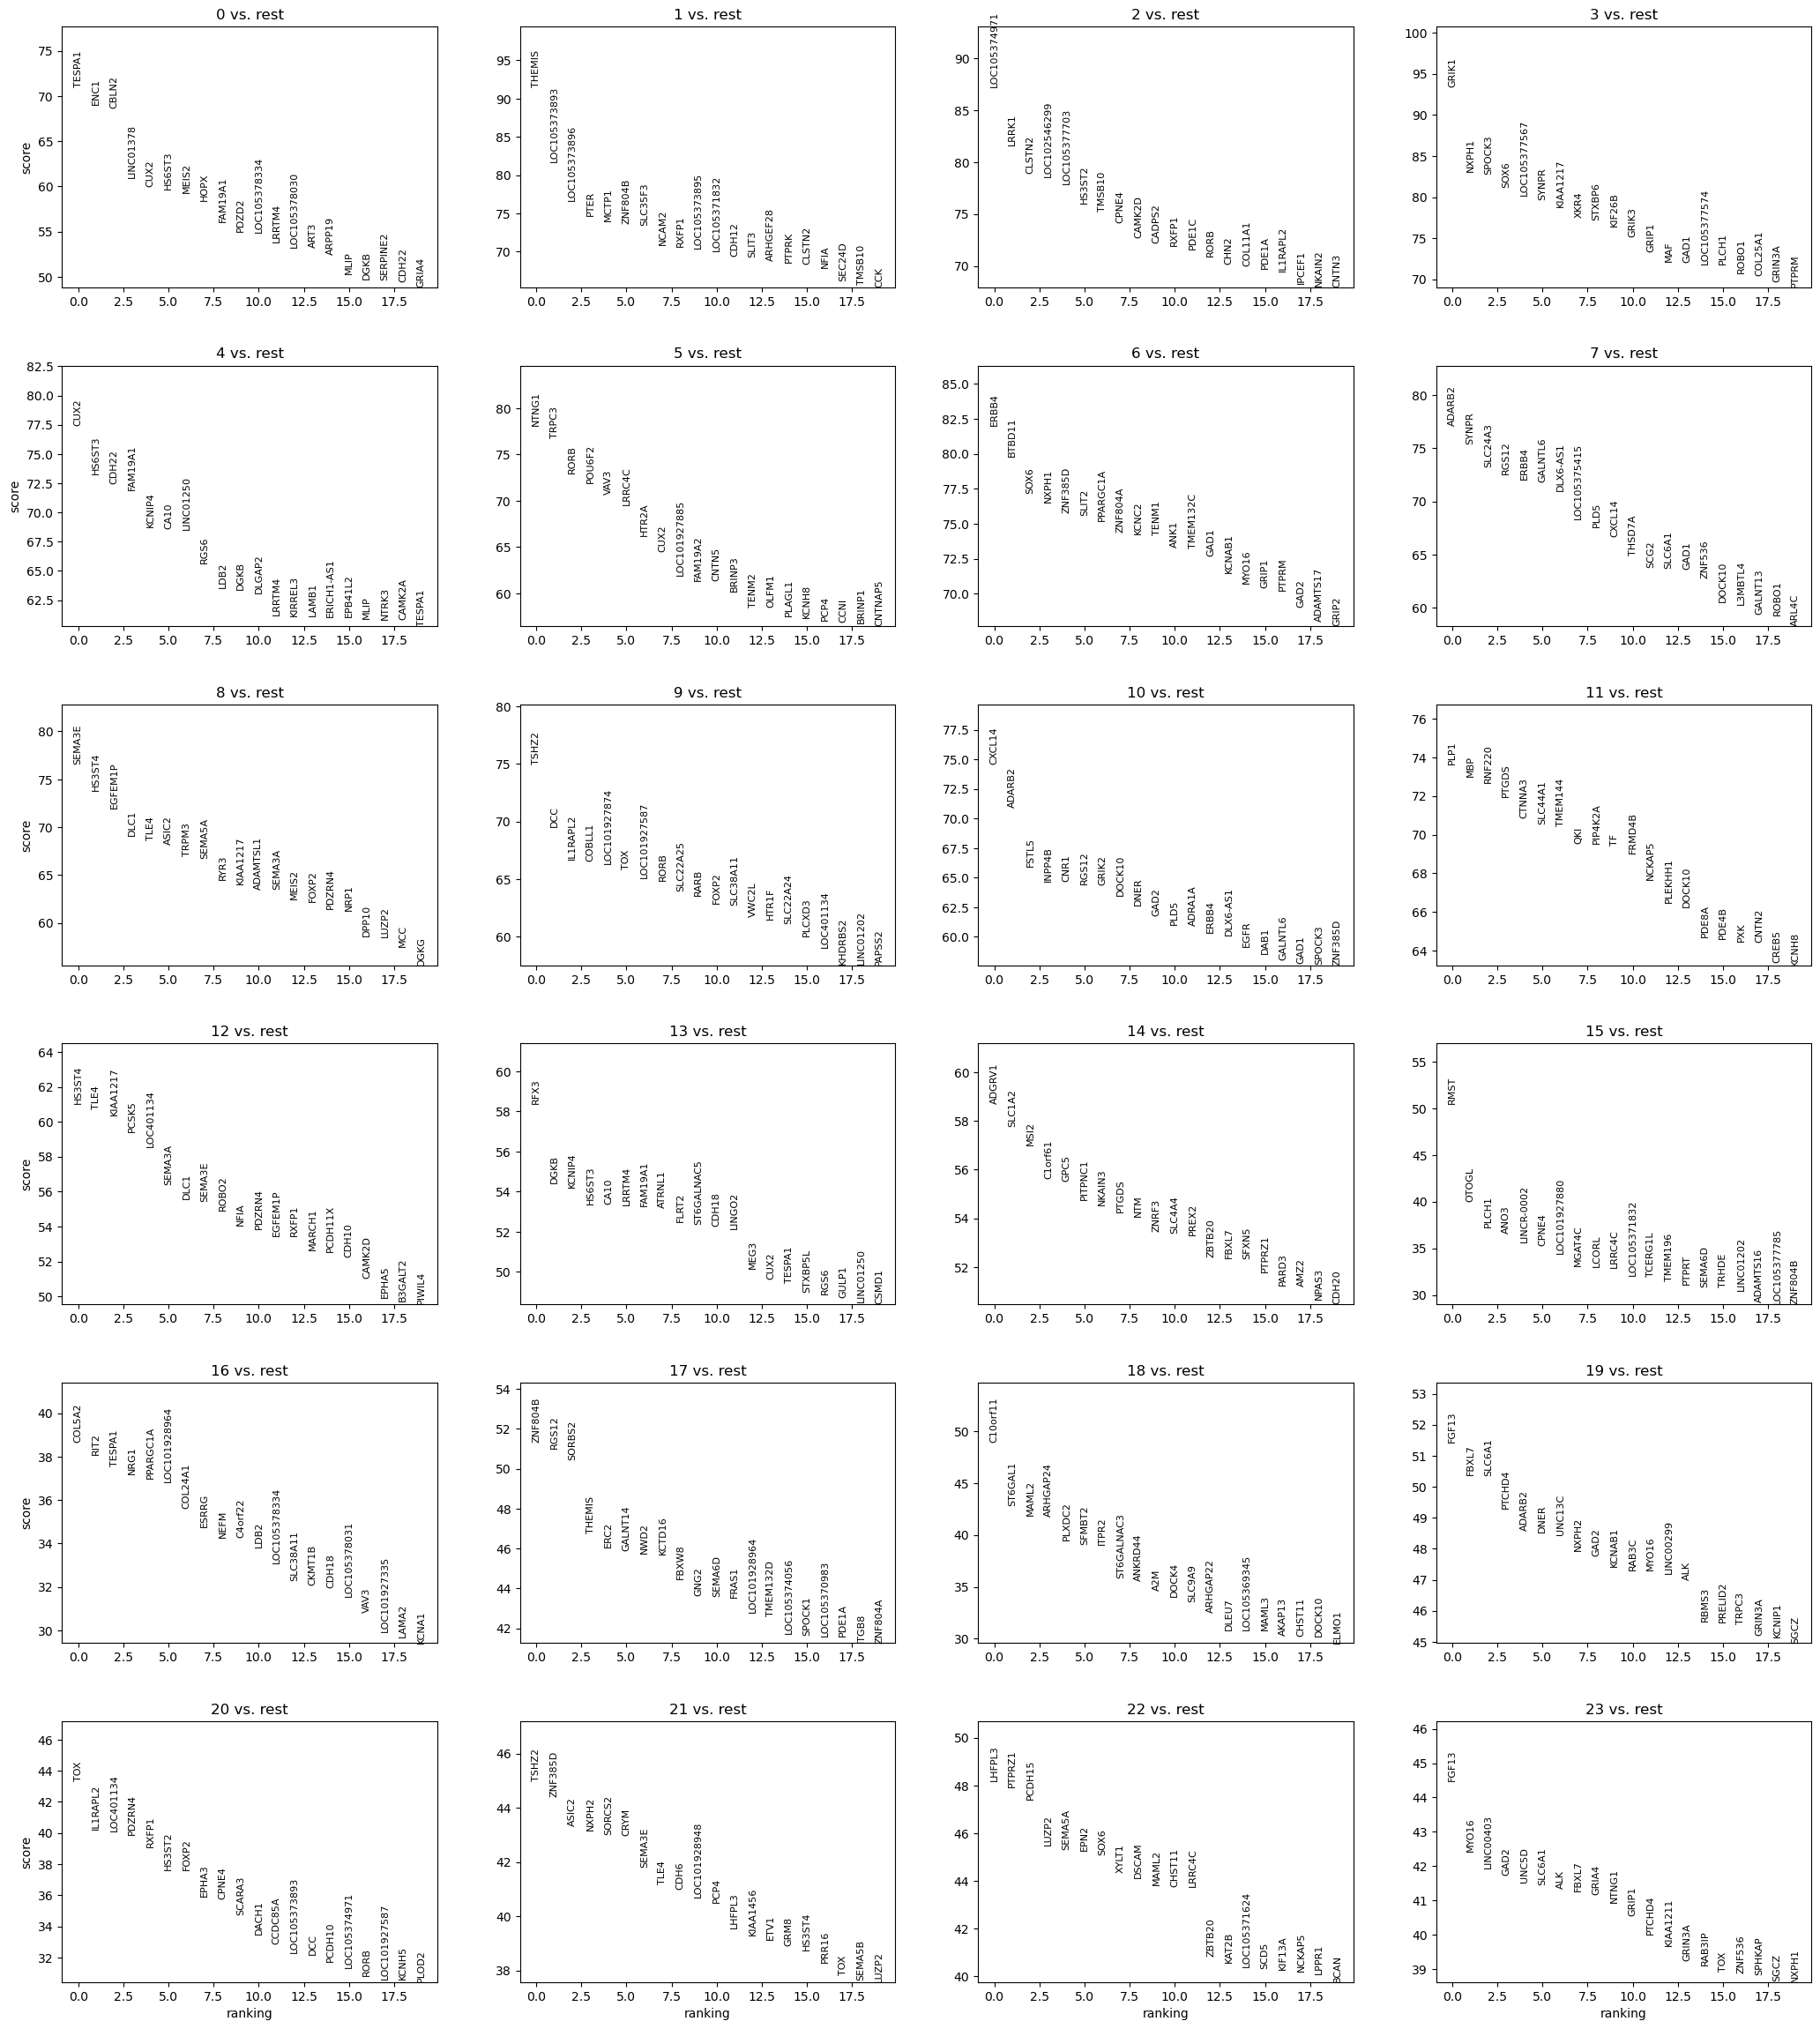

In [111]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [112]:
pip install SCINA

ERROR: Could not find a version that satisfies the requirement SCINA (from versions: none)
ERROR: No matching distribution found for SCINA
Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install celltypist

  Obtaining dependency information for celltypist from https://files.pythonhosted.org/packages/d0/3a/98625ae40c1c839354d6bee4e389f23ecb9be94a42573f58f4ea4255e81c/celltypist-1.6.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
  Obtaining dependency information for leidenalg>=0.9.0 from https://files.pythonhosted.org/packages/82/90/0b9525098a7458939f5c2b956ffdc1fed460c0fe706f549087c3b0d12b81/leidenalg-0.10.2-cp38-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 28.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [114]:
import celltypist
import pandas as pd

# Assuming your normalized_sample variable is the expression matrix
expression_matrix = normalized_sample.set_index('sample_name')


In [115]:
expression_matrix = expression_matrix.T

In [120]:
pip install celltypist --upgrade

Note: you may need to restart the kernel to use updated packages.


In [121]:
import celltypist

# Load the default model (for example purposes, let's use 'Immune_All_Low.pkl')
model = celltypist.models.download_models('Immune_All_Low.pkl')


📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 50
📂 Storing models in /Users/tanmaysagarhuria/.celltypist/data/models
💾 Downloading model [1/50]: Immune_All_Low.pkl
💾 Downloading model [2/50]: Immune_All_High.pkl
💾 Downloading model [3/50]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/50]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/50]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [6/50]: Adult_Human_Skin.pkl
💾 Downloading model [7/50]: Adult_Mouse_Gut.pkl
💾 Downloading model [8/50]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [9/50]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [10/50]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [11/50]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [12/50]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [13/50]: COVID19_Immune_Landscape.pkl
💾 Downloading model [14/50]: Cells_Adult_Breast.pkl
💾 Downloading model [15/50]: Cells_Fetal

In [123]:
import os

model_directory = '/Users/tanmaysagarhuria/.celltypist/data/models/'
print(os.listdir(model_directory))

['Lethal_COVID19_Lung.pkl', 'Cells_Human_Tonsil.pkl', 'Fetal_Human_Pancreas.pkl', 'Human_Longitudinal_Hippocampus.pkl', 'Human_IPF_Lung.pkl', 'Human_Lung_Atlas.pkl', 'models.json', 'Mouse_Isocortex_Hippocampus.pkl', 'Developing_Mouse_Brain.pkl', 'Adult_Human_Skin.pkl', 'Immune_All_High.pkl', 'Mouse_Postnatal_DentateGyrus.pkl', 'Cells_Lung_Airway.pkl', 'Developing_Human_Brain.pkl', 'Cells_Fetal_Lung.pkl', 'Developing_Human_Organs.pkl', 'Cells_Intestinal_Tract.pkl', 'Developing_Human_Gonads.pkl', 'Human_Embryonic_YolkSac.pkl', 'Developing_Human_Thymus.pkl', 'Fetal_Human_Pituitary.pkl', 'Adult_Human_PancreaticIslet.pkl', 'Developing_Human_Hippocampus.pkl', 'Human_Placenta_Decidua.pkl', 'Human_Developmental_Retina.pkl', 'Adult_Mouse_Gut.pkl', 'Healthy_Mouse_Liver.pkl', 'Adult_Pig_Hippocampus.pkl', 'Healthy_Adult_Heart.pkl', 'Human_AdultAged_Hippocampus.pkl', 'Fetal_Human_AdrenalGlands.pkl', 'Mouse_Whole_Brain.pkl', 'Fetal_Human_Skin.pkl', 'COVID19_HumanChallenge_Blood.pkl', 'Adult_COVID19_

In [124]:
import celltypist
import pandas as pd

# Load the normalized expression data
# Assuming `normalized_sample` is your preprocessed expression matrix
expression_data = normalized_sample.set_index('sample_name')  # Ensure sample_name is the index

# Load the Pan_Fetal_Human model
model_path = '/Users/tanmaysagarhuria/.celltypist/data/models/Pan_Fetal_Human.pkl'
model = celltypist.models.Model.load(model_path)

In [126]:
import anndata

# Convert the DataFrame to an AnnData object
adata = anndata.AnnData(X=expression_data)

In [128]:
# Save the DataFrame to a CSV file
expression_data.to_csv('expression_data.csv')

# Use the saved file path with CellTypist
predictions = celltypist.annotate('expression_data.csv', model=model)

# Display predictions
print(predictions.predicted_labels)

📁 Input file is 'expression_data.csv'
⏳ Loading data
⚠️ Warning: the input file seems not a raw count matrix. The prediction result may not be accurate
🔬 Input data has 10 cells and 50281 genes
🔗 Matching reference genes in the model
🧬 6763 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


                                    predicted_labels
F2S4_160113_027_A01  LOW_QUALITY_MID_ERY_(HIGH_RIBO)
F2S4_160113_027_B01           PLACENTAL_CONTAMINANTS
F2S4_160113_027_C01                       MELANOCYTE
F2S4_160113_027_D01                         PLASMA_B
F2S4_160113_027_E01           LOW_QUALITY_MACROPHAGE
F2S4_160113_027_F01  LOW_QUALITY_MID_ERY_(HIGH_RIBO)
F2S4_160113_027_G01                         PLASMA_B
F2S4_160113_028_B01                         PLASMA_B
F2S4_160113_028_C01           LOW_QUALITY_MACROPHAGE
F2S4_160113_028_F01                         PLASMA_B


In [130]:
output_path = '/Users/tanmaysagarhuria/Downloads/dask_df_normalized_output.csv'
dask_df_normalized.to_csv(output_path, single_file=True)
print(f"Normalized DataFrame saved to {output_path}")

Normalized DataFrame saved to /Users/tanmaysagarhuria/Downloads/dask_df_normalized_output.csv


In [132]:
print(dask_df_hvg.head())

        A2M      AAAS      AACS  AADAT     AAGAB      AARS     AASDH  \
0  3.737670  0.000000  3.610918    0.0  0.000000  0.693147  1.791759   
1  0.000000  0.693147  5.446737    0.0  6.539586  6.025866  0.000000   
2  0.000000  0.000000  0.000000    0.0  0.000000  1.609438  0.693147   
3  0.000000  0.000000  0.000000    0.0  0.000000  4.143135  5.247024   
4  0.693147  0.000000  3.091042    0.0  0.693147  4.304065  5.411646   

   AASDHPPT      ABAT    ABCA10  ...   ZSCAN18   ZSCAN26   ZSCAN30   ZSCAN31  \
0  0.000000  5.010635  2.890372  ...  2.397895  0.000000  0.693147  0.693147   
1  3.610918  6.577861  0.000000  ...  2.302585  0.000000  0.000000  0.000000   
2  0.000000  4.919981  6.244167  ...  0.000000  0.000000  0.000000  0.693147   
3  4.941642  4.948760  2.079442  ...  5.099866  6.200509  4.234107  0.000000   
4  0.000000  5.991465  5.707110  ...  3.091042  0.000000  6.340359  2.397895   

     ZSWIM5    ZSWIM6      ZXDC    ZYG11B     ZZEF1      ZZZ3  
0  5.866468  0.693147 

In [133]:
sample_names = normalized_sample['sample_name']

In [134]:
dask_df_hvg_with_sample_name = dd.concat([sample_names, dask_df_hvg], axis=1)

In [136]:
merged_df = dd.merge(dask_df_hvg_with_sample_name, metadata, on='sample_name')

In [139]:
import dask.dataframe as dd
import pandas as pd

# Step 1: Convert `sample_names` (which is a Pandas Series) to a Dask DataFrame
sample_names_ddf = dd.from_pandas(sample_names, npartitions=dask_df_hvg.npartitions)

# Step 2: Repartition both DataFrames with known divisions
sample_names_repartitioned = sample_names_ddf.repartition(npartitions=dask_df_hvg.npartitions)

In [140]:
dask_df_hvg_repartitioned = dask_df_hvg.repartition(npartitions=dask_df_hvg.npartitions)


In [141]:
dask_df_hvg_with_sample_name = dd.concat([sample_names_repartitioned, dask_df_hvg_repartitioned], axis=1)

In [142]:
dask_df_hvg_with_sample_name = dask_df_hvg_with_sample_name.repartition(npartitions=dask_df_hvg.npartitions)

In [145]:
import dask.dataframe as dd

# Assuming `metadata` is your Pandas DataFrame

# Step 1: Convert `metadata` from Pandas to Dask DataFrame
metadata_ddf = dd.from_pandas(metadata, npartitions=dask_df_hvg_with_sample_name.npartitions)

# Step 2: Repartition the Dask DataFrames
metadata_repartitioned = metadata_ddf.repartition(npartitions=dask_df_hvg_with_sample_name.npartitions)

# Step 3: Merge with the HVG DataFrame that includes `sample_name`
merged_df = dd.merge(dask_df_hvg_with_sample_name, metadata_repartitioned, on='sample_name')


In [148]:
non_numeric_columns = dask_df_normalized.select_dtypes(exclude=[np.number])


In [149]:
hvg_with_non_numeric = dd.concat([non_numeric_columns, dask_df_hvg], axis=1)

# Step 3: Persist the merged DataFrame to improve performance
hvg_with_non_numeric = hvg_with_non_numeric.persist()


In [150]:
print(hvg_with_non_numeric.head())

           sample_name       A2M      AAAS      AACS  AADAT     AAGAB  \
0  F2S4_160113_027_A01  3.737670  0.000000  3.610918    0.0  0.000000   
1  F2S4_160113_027_B01  0.000000  0.693147  5.446737    0.0  6.539586   
2  F2S4_160113_027_C01  0.000000  0.000000  0.000000    0.0  0.000000   
3  F2S4_160113_027_D01  0.000000  0.000000  0.000000    0.0  0.000000   
4  F2S4_160113_027_E01  0.693147  0.000000  3.091042    0.0  0.693147   

       AARS     AASDH  AASDHPPT      ABAT  ...   ZSCAN18   ZSCAN26   ZSCAN30  \
0  0.693147  1.791759  0.000000  5.010635  ...  2.397895  0.000000  0.693147   
1  6.025866  0.000000  3.610918  6.577861  ...  2.302585  0.000000  0.000000   
2  1.609438  0.693147  0.000000  4.919981  ...  0.000000  0.000000  0.000000   
3  4.143135  5.247024  4.941642  4.948760  ...  5.099866  6.200509  4.234107   
4  4.304065  5.411646  0.000000  5.991465  ...  3.091042  0.000000  6.340359   

    ZSCAN31    ZSWIM5    ZSWIM6      ZXDC    ZYG11B     ZZEF1      ZZZ3  
0  0.6

In [151]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [152]:
import scanpy as sc
import pandas as pd

In [153]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [154]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `hvg_with_non_numeric` is your normalized DataFrame
# Remove any non-numeric columns if necessary
hvg_numeric = hvg_with_non_numeric.select_dtypes(include=[float, int])

In [155]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')

In [156]:
umap_embedding = reducer.fit_transform(hvg_numeric)

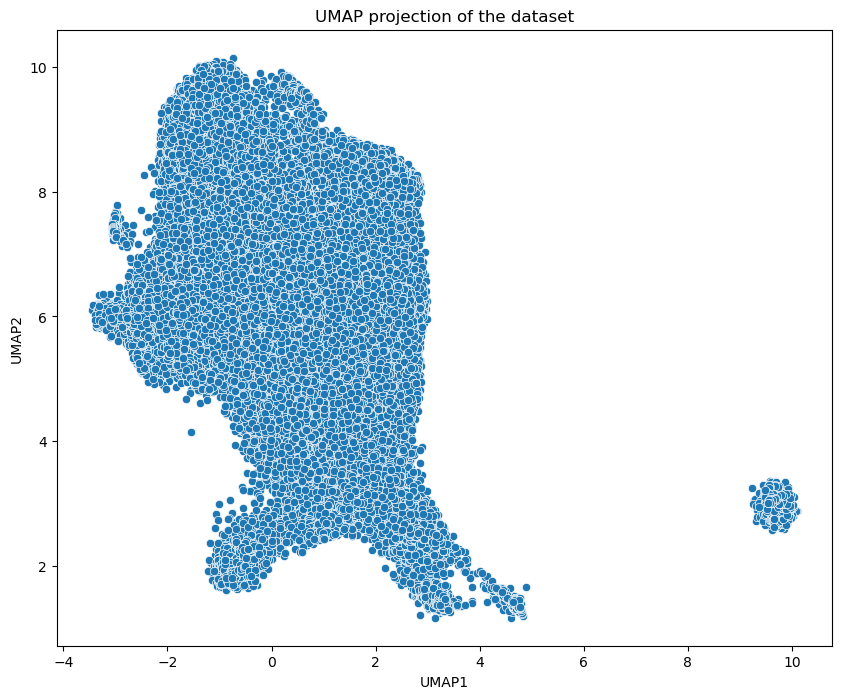

In [158]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1])
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [159]:
import scanpy as sc

In [168]:
import dask.array as da

# Convert Dask DataFrame to Dask Array, managing chunks manually
X_dask = hvg_with_non_numeric.to_dask_array(lengths=True)

In [174]:
sample_name_column = hvg_with_non_numeric[['sample_name']]

# Drop the sample_name column from the main DataFrame
hvg_numeric_only = hvg_with_non_numeric.drop(columns=['sample_name'])

In [175]:
# Convert each column to numeric, forcing non-numeric data to NaN
X_dask_numeric = hvg_numeric_only.map_partitions(lambda df: df.apply(pd.to_numeric, errors='coerce'))

# Fill NaN values with 0 (or any other appropriate strategy)
X_dask_filled = X_dask_numeric.fillna(0)

In [178]:
pip install scvi-tools[scanpy]

zsh:1: no matches found: scvi-tools[scanpy]
Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install 'scvi-tools[scanpy]'

  Obtaining dependency information for scvi-tools[scanpy] from https://files.pythonhosted.org/packages/e4/6d/cfbd16707e94809c5b5f360ffa36c13a8fdfe5c93cc6f5a2447358c6ff14/scvi_tools-1.1.6-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for flax from https://files.pythonhosted.org/packages/1c/a9/6978d2547b1d8ca0ce75b534c0ba5c60e8e7b918c5c1800225aa0169cb7f/flax-0.8.5-py3-none-any.whl.metadata
  Obtaining dependency information for jax>=0.4.4 from https://files.pythonhosted.org/packages/7e/cf/5f51b43bd692e90585c0ef6e8d1b0db5d254fe0224a6570daa59a1be014f/jax-0.4.31-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib>=0.4.3 from https://files.pythonhosted.org/packages/18/ea/eddfae920bf689314aa0302a4c841cfac01b6cfd77f60f1a3f3dd355fddc/jaxlib-0.4.31-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for lightning<2.2,>=2.0 from https://files.pythonhosted.org/packages/0f/7a/61bd426456959e959643ce

In [180]:
import scvi
import scanpy as sc
import pandas as pd

In [181]:
print(hvg_with_non_numeric.head())

           sample_name       A2M      AAAS      AACS  AADAT     AAGAB  \
0  F2S4_160113_027_A01  3.737670  0.000000  3.610918    0.0  0.000000   
1  F2S4_160113_027_B01  0.000000  0.693147  5.446737    0.0  6.539586   
2  F2S4_160113_027_C01  0.000000  0.000000  0.000000    0.0  0.000000   
3  F2S4_160113_027_D01  0.000000  0.000000  0.000000    0.0  0.000000   
4  F2S4_160113_027_E01  0.693147  0.000000  3.091042    0.0  0.693147   

       AARS     AASDH  AASDHPPT      ABAT  ...   ZSCAN18   ZSCAN26   ZSCAN30  \
0  0.693147  1.791759  0.000000  5.010635  ...  2.397895  0.000000  0.693147   
1  6.025866  0.000000  3.610918  6.577861  ...  2.302585  0.000000  0.000000   
2  1.609438  0.693147  0.000000  4.919981  ...  0.000000  0.000000  0.000000   
3  4.143135  5.247024  4.941642  4.948760  ...  5.099866  6.200509  4.234107   
4  4.304065  5.411646  0.000000  5.991465  ...  3.091042  0.000000  6.340359   

    ZSCAN31    ZSWIM5    ZSWIM6      ZXDC    ZYG11B     ZZEF1      ZZZ3  
0  0.6

In [183]:
dask_path = '/Users/tanmaysagarhuria/Downloads/dask_df_normalized_output.csv'
dask_model_df = dd.read_csv(dask_path, sample=4000000)  # Adjust the sample size if needed

In [184]:
print(dask_model_df.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0   
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1  \
0      0.0  0.000000       0.0   0.0  ...   0.0  5.645447  0.000000       0.0   
1      0.0  4.779123       0.0   0.0  ...   0.0  6.794587  0.000000       0.0   
2      0.0  0.000000       0.0   0.0  ...   0.0  0.000000  0.693147       0.0   
3      0.0  5.075174       0.0   0.0  ...   0.0  5.049856  0.693147       0.0   
4      0.0  0.693147       0.0   0.0  ...   0.0  2.708050  0.693147       0.0   

     ZYG11B      ZYX     ZZEF1      ZZZ3  bA255A11.4  bA395L14.12  


In [185]:
import dask.dataframe as dd

# Assuming 'hvg_with_non_numeric' and 'metadata' are both Dask DataFrames
# Convert 'metadata' to a Dask DataFrame if it's not already
metadata_dask = dd.from_pandas(metadata, npartitions=10)  # Adjust npartitions as needed

# Perform the merge operation
merged_ddf = dd.merge(hvg_with_non_numeric, metadata_dask, on='sample_name', how='inner')

# Trigger computation and see the first few rows
merged_sample = merged_ddf.head()
print(merged_sample)

           sample_name  A2M  AAAS      AACS    AADAT     AAGAB      AARS  \
0  F1S4_171206_354_B01  0.0   0.0  0.000000  2.70805  0.000000  4.204693   
1  F1S4_171206_389_A01  0.0   0.0  3.828641  0.00000  1.945910  0.000000   
2  F2S4_180207_016_F01  0.0   0.0  2.564949  0.00000  0.000000  3.178054   
3  F2S4_180207_041_G01  0.0   0.0  4.905275  0.00000  0.000000  5.262690   
4  F2S4_180924_022_C01  0.0   0.0  0.000000  0.00000  3.850148  0.000000   

      AASDH  AASDHPPT      ABAT  ...  cell_type_alt_alias_order  \
0  0.000000  5.424950  2.397895  ...                       74.0   
1  4.204693  3.555348  3.931826  ...                       92.0   
2  3.135494  4.465908  4.143135  ...                       68.0   
3  4.852030  5.267858  0.000000  ...                       86.0   
4  0.693147  4.700480  0.693147  ...                       62.0   

   cell_type_alt_alias_label  cell_type_designation_color  \
0                       <NA>                      #BDC123   
1                 

In [187]:
import umap

# Assuming you've got your merged_ddf dataframe ready
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')

In [188]:
# Note: You will likely need to compute and transform your Dask DataFrame to a numpy array or similar
X = merged_ddf.drop(columns=['sample_name']).compute().values  # Assuming non-numeric columns have been handled

In [190]:
import dask.dataframe as dd

# Load your merged Dask DataFrame
# Assuming 'merged_df' is already created and loaded

# Identify categorical columns by checking the data type of each column
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical columns
print("Categorical columns in the DataFrame:")
print(categorical_columns)

Categorical columns in the DataFrame:
[]


In [191]:
import dask.dataframe as dd

# Inspect the data types of all columns
column_dtypes = merged_df.dtypes

# Display the data types of all columns
print(column_dtypes)

# Manually identify any object-type columns (which are often categorical)
potential_categorical_columns = column_dtypes[column_dtypes == 'object'].index.tolist()

print("Potential categorical columns in the DataFrame:")
print(potential_categorical_columns)

sample_name                  string[pyarrow]
A2M                                  float64
AAAS                                 float64
AACS                                 float64
AADAT                                float64
                                  ...       
external_donor_name_color    string[pyarrow]
external_donor_name_order              int64
external_donor_name_label    string[pyarrow]
outlier_call                            bool
outlier_type                 string[pyarrow]
Length: 5069, dtype: object
Potential categorical columns in the DataFrame:
[]


In [192]:
import dask.dataframe as dd

# Assuming your metadata is already loaded into a Dask DataFrame named `metadata`
# Display all columns in the metadata DataFrame
metadata_columns = metadata.columns.tolist()

print("Columns in the metadata DataFrame:")
print(metadata_columns)

Columns in the metadata DataFrame:
['exp_component_name', 'specimen_type', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_order', 'full_genotype_label', 'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color', 'region_order', 'region_label', 'cortical_layer_color', 'cortical_layer_order', 'cortical_layer_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_order', 'cell_type_designation_label', 'external_donor_name_color', 'external_donor_name_order', 'external_donor_name_label', 'outlier_call', 'outlier_type']


In [193]:
import pandas as pd

# List of categorical columns based on the metadata
categorical_columns = [
    'exp_component_name', 'specimen_type', 'cluster_color', 'cluster_order',
    'cluster_label', 'class_color', 'class_order', 'class_label',
    'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color',
    'full_genotype_order', 'full_genotype_label', 'donor_sex_color',
    'donor_sex_order', 'donor_sex_label', 'region_color', 'region_order',
    'region_label', 'cortical_layer_color', 'cortical_layer_order',
    'cortical_layer_label', 'cell_type_accession_color', 'cell_type_accession_order',
    'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order',
    'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order',
    'cell_type_alt_alias_label', 'cell_type_designation_color',
    'cell_type_designation_order', 'cell_type_designation_label',
    'external_donor_name_color', 'external_donor_name_order',
    'external_donor_name_label', 'outlier_call', 'outlier_type'
]

# Perform one-hot encoding on the categorical columns
merged_df_encoded = pd.get_dummies(merged_sample, columns=categorical_columns, drop_first=True)

# Display the first few rows to check the result
print(merged_df_encoded.head())

           sample_name  A2M  AAAS      AACS    AADAT     AAGAB      AARS  \
0  F1S4_171206_354_B01  0.0   0.0  0.000000  2.70805  0.000000  4.204693   
1  F1S4_171206_389_A01  0.0   0.0  3.828641  0.00000  1.945910  0.000000   
2  F2S4_180207_016_F01  0.0   0.0  2.564949  0.00000  0.000000  3.178054   
3  F2S4_180207_041_G01  0.0   0.0  4.905275  0.00000  0.000000  5.262690   
4  F2S4_180924_022_C01  0.0   0.0  0.000000  0.00000  3.850148  0.000000   

      AASDH  AASDHPPT      ABAT  ...  cell_type_designation_order_74.0  \
0  0.000000  5.424950  2.397895  ...                              True   
1  4.204693  3.555348  3.931826  ...                             False   
2  3.135494  4.465908  4.143135  ...                             False   
3  4.852030  5.267858  0.000000  ...                             False   
4  0.693147  4.700480  0.693147  ...                             False   

   cell_type_designation_order_86.0  cell_type_designation_order_92.0  \
0                        

In [195]:
n_features = data_for_pca.shape[1]
print(f"Number of features available: {n_features}")

Number of features available: 5112


In [197]:
n_components = 5  # or any value <= number of samples
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_for_pca)

In [199]:
import scanpy as sc

# Assuming 'pca_result' is your PCA output and 'merged_df_encoded' is the final DataFrame

# Create an AnnData object
adata = sc.AnnData(X=pca_result)

In [200]:
adata.obsm['X_pca'] = pca_result


In [201]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca')


In [1]:
sc.tl.leiden(adata, resolution=1.0)


NameError: name 'sc' is not defined